Enter the profile data in the cell under
All units in mm (mm^4,N/mm^2, ect)

In [204]:
#Enter Profile data
ProfileLength =50
ProfileWidth =40
Wallthikness =5
E = 6000
Zul =40

Il= (ProfileWidth*(ProfileLength**3))/12
Iw= (ProfileLength*(ProfileWidth**3))/12

Enter the force parameters

In [205]:
#Enter force data
Ftot = 25
Dfx = 280
Dfy = 160



Enter the simulation paramters

In [206]:
import numpy as np
#Simulation Param
Res = 1     #number of cell per mm (1 def)
Scale_of_graph = 10     #Scale of graph (inches)
Force_relative_to_corner = True #Where the force center is placed

if Force_relative_to_corner:
    Mx = (Dfx + ProfileLength/2)*(Ftot*np.sin(np.tan(Dfy/Dfx)))
    My = (Dfy + ProfileWidth/2)*(Ftot*np.cos(np.tan(Dfy /Dfx)))
else:
    Mx = Dfx*(Ftot*np.sin(np.tan(Dfy/Dfx)))
    My = Dfy*(Ftot*np.cos(np.tan(Dfy/Dfx)))

Simulation matrix and misc Setup

In [207]:
Rows = ProfileLength*Res
Column = ProfileWidth*Res
EfInt = [[0 for _ in range(Rows)] for _ in range(Column)]
i = 0
j = 0
'''
for i in range(len(EfInt)):
    for j in range(len(EfInt[0])):
        EfInt[i][j] = ((-Mx*((i-(Rows/2))/Res))/Il)+((-My*((j-(Column/2))/Res))/Iw)
     '''
for i in range(len(EfInt)):
    for j in range(len(EfInt[0])):
        if j>=(ProfileLength-Wallthikness)*Res or i>=(ProfileWidth-Wallthikness)*Res or i<(Wallthikness)*Res or j<(Wallthikness)*Res:
            EfInt[i][j] = ((-Mx*((i-(Rows/2))/Res))/Il)+((-My*((j-(Column/2))/Res))/Iw)
        else:
            EfInt[i][j] = 0

Generate the graph

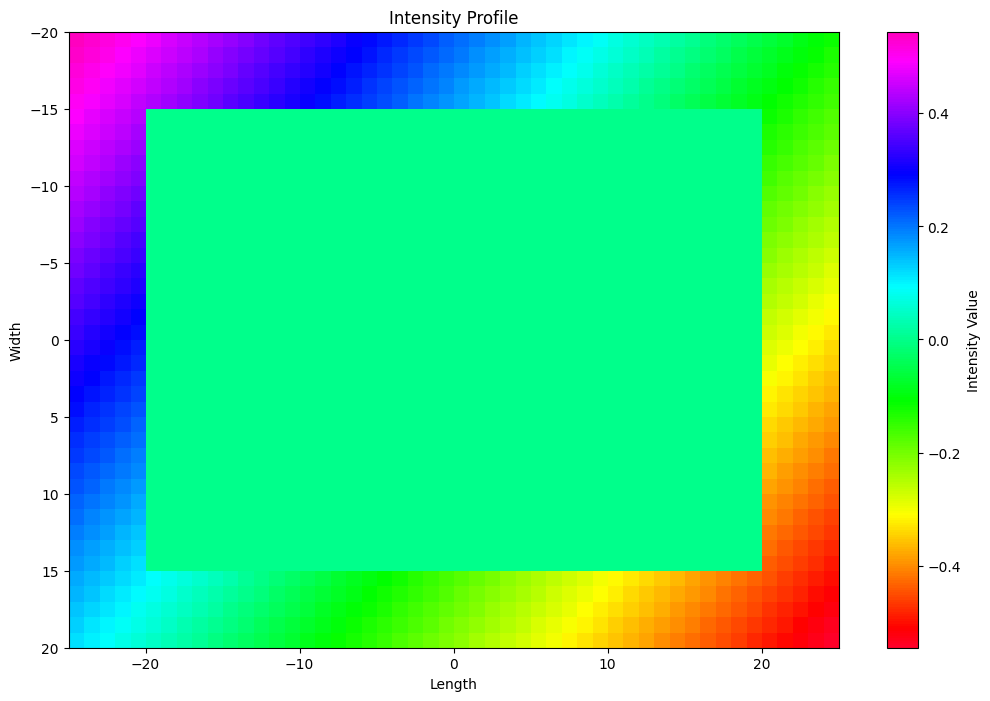

Max Stress: 0.5444156889687527 [MPa]
Min Stress: -0.5452656097741158 [MPa]


In [208]:
import matplotlib.pyplot as plt
from matplotlib import cm

grid = np.array(EfInt)
plt.figure(figsize=((Scale_of_graph*(Rows/Column)), (Scale_of_graph*(Column/Rows))))

plt.imshow(grid,
           extent=(-ProfileLength/2, ProfileLength/2, ProfileWidth/2, -ProfileWidth/2),
           interpolation='nearest',
           cmap=cm.gist_rainbow)


plt.colorbar(label='Intensity Value')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Intensity Profile')
plt.show()


# 1. Find the numerical max and min values in your array
max_stress = np.max(grid)
min_stress = np.min(grid)

print("Max Stress: " + str(max_stress) + " [MPa]" "\n"  "Min Stress: " +  str(min_stress) + " [MPa]")
